In [60]:
import os
import sys
import numpy as np
import pandas as pd
import pickle
from datetime import datetime
import symbolic_transfer_entropy as ste
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from collections import defaultdict

In [2]:
os.listdir('/home/pranavgoel/trans-fer-entropy/keyword_extraction')

['florida_url_to_dated_keywords.pkl',
 'california_url_to_dated_keywords.pkl',
 'illinois_url_to_dated_keywords.pkl',
 'texas_url_to_dated_keywords.pkl',
 'extract_and_save_keywords_for_all_articles.ipynb',
 'newyork_url_to_dated_keywords.pkl',
 'ohio_url_to_dated_keywords.pkl',
 'README.md',
 'nytimes_foxnews_url_to_dated_keywords.pkl',
 '.ipynb_checkpoints']

In [48]:
data_path = '/home/pranavgoel/trans-fer-entropy/keyword_extraction'

In [49]:
with open(data_path+'/'+'florida_url_to_dated_keywords.pkl', 'rb') as flpkl:
    fl = pickle.load(flpkl)

In [50]:
fl_dates = [datetime.strptime(v[0], '%Y-%m-%d %H:%M:%S') for v in fl.values()]

In [51]:
# Convert the list of datetime values to a pandas Series
datetime_series = pd.to_datetime(fl_dates)

# Create a time series of counts using pandas
count_series = datetime_series.value_counts().sort_index()

# You can also resample the time series to fill missing gaps if necessary
# For example, resample to hourly counts:
count_series = count_series.resample('D').count().fillna(0)

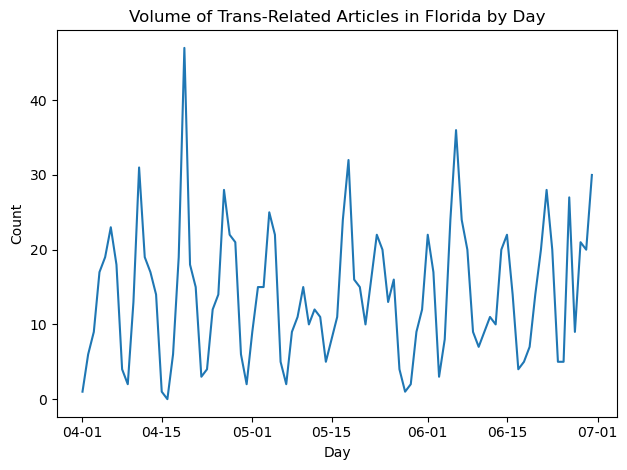

In [57]:
fig, ax = plt.subplots()
ax.plot(count_series)

date_format = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_format)

plt.title('Volume of Trans-Related Articles in Florida by Day')
ax.set_xlabel('Day')
ax.set_ylabel('Count')


plt.tight_layout()
plt.savefig('/home/sagar/trans-fer-entropy/plots_and_images/fl_article_volume.pdf')

In [58]:
with open(data_path+'/'+'nytimes_foxnews_url_to_dated_keywords.pkl', 'rb') as nytfoxpkl:
    nytfox = pickle.load(nytfoxpkl)

In [59]:
nytfox_dates = [datetime.strptime(v[0], '%Y-%m-%d %H:%M:%S') for v in nytfox.values()]

In [60]:
# Convert the list of datetime values to a pandas Series
nytfox_series = pd.to_datetime(nytfox_dates)

# Create a time series of counts using pandas
nytfox_counts = nytfox_series.value_counts().sort_index()

# You can also resample the time series to fill missing gaps if necessary
# For example, resample to hourly counts:
nytfox_counts = nytfox_counts.resample('D').count().fillna(0)

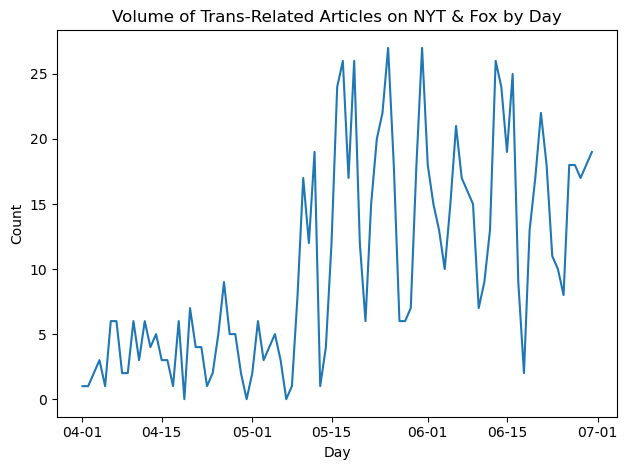

In [61]:
fig, ax = plt.subplots()
ax.plot(nytfox_counts)

date_format = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_format)

plt.title('Volume of Trans-Related Articles on NYT & Fox by Day')
ax.set_xlabel('Day')
ax.set_ylabel('Count')


plt.tight_layout()
plt.savefig('/home/sagar/trans-fer-entropy/plots_and_images/nytfox_article_volume.pdf')

In [62]:
len(list(count_series.values)), len(list(count_series.values))

(91, 91)

In [42]:
nytfox_to_fl_te_1d_4w = symbolic_transfer_entropy_again(list(count_series.values), list(nytfox_counts.values), w=4, s=1)
print(nytfox_to_fl_te_1d_4w)

0.6770455884898198


In [43]:
fl_to_nytfox_te_1d_4w = symbolic_transfer_entropy_again(list(nytfox_counts.values),list(count_series.values), w=4, s=1)
print(fl_to_nytfox_te_1d_4w)

0.8679345589507922


In [46]:
nytfox_to_fl_te_3d_4w = symbolic_transfer_entropy_again(list(count_series.values), list(nytfox_counts.values), w=4, s=3)
print(nytfox_to_fl_te_3d_4w)

0.5629072918469556


In [47]:
fl_to_nytfox_te_3d_4w = symbolic_transfer_entropy_again(list(nytfox_counts.values),list(count_series.values), w=4, s=3)
print(fl_to_nytfox_te_3d_4w)

0.16666666666666666


In [2]:
list(range(1,3))

[1, 2]

# Synthetic Tests

In [36]:
# Domain
T = np.linspace(0, 10, 100)

## Sine-Based Tests

In [ ]:
# Signal
x = np.array([np.sin(t) for t in T])

# Gaussian Noise with mean 0, std = 0.2
s = np.random.normal(0, 0.2, len(T))

# Delay
d = 3

# Comparators
x0 = np.array([i**2 for i in x]) # input squared
x1 = np.array([i + s[t] for t, i in enumerate(x)]) # x + gaussian noise
x2 = np.array([np.sin(t-1) for t in T]) # time-delayed x
x3 = np.array([np.sin(i-1) + s[t] for t, i in enumerate(T)]) # Delayed with Gaussian noise
x4 = np.array([x[t] + s[t]*i for t,i in enumerate(T)]) # x + time-varying noise
x5 = np.array([0]*d+[np.sin(t) for t in T[:-d]]) # exact time-delayed x


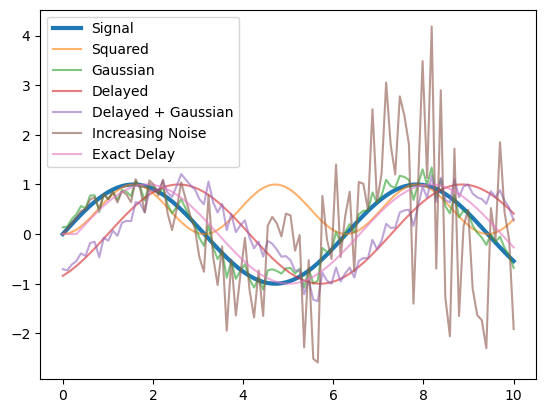

In [37]:
all_signals = [(x, 'Signal'), (x0, 'Squared'), (x1, 'Gaussian'), (x2, 'Delayed'), 
               (x3, 'Delayed + Gaussian'), (x4, 'Increasing Noise'), (x5, 'Exact Delay')]

for sig, label in all_signals:
    if label=='Signal':
        a = 1
        t = 3
    else:
        a = 0.6
        t = 1.5
        
    plt.plot(T, sig, label=label, alpha=a, linewidth=t)
    
plt.legend()

In [38]:
ste_41 = list()
for sig,label in all_signals:
    TE = ste.symbolic_transfer_entropy(x=x, y=sig, w=4, s=1)
    ste_41.append((TE, label))

In [39]:
ste_41

[(0.0, 'Signal'),
 (2.671234269745307, 'Squared'),
 (3.0110013167763183, 'Gaussian'),
 (2.3853268371782135, 'Delayed'),
 (2.782588158729759, 'Delayed + Gaussian'),
 (2.6594381585779368, 'Increasing Noise'),
 (0.6140092143977858, 'Exact Delay')]

In [40]:
ste_41_r = list()
for sig,label in all_signals:
    TE = ste.symbolic_transfer_entropy(x=sig, y=x, w=4, s=1)
    ste_41_r.append((TE, label))

In [41]:
ste_41_r

[(0.0, 'Signal'),
 (1.2362307050326893, 'Squared'),
 (0.21052631578947367, 'Gaussian'),
 (2.7796824626705603, 'Delayed'),
 (0.250257236955972, 'Delayed + Gaussian'),
 (0.41709539492662, 'Increasing Noise'),
 (2.173283124016643, 'Exact Delay')]

In [47]:
ste_21_r = list()
for sig,label in all_signals:
    TE = ste.symbolic_transfer_entropy(x=sig, y=x, w=2, s=1)
    ste_21_r.append((TE, label))

In [48]:
ste_21_r

[(0.0, 'Signal'),
 (5.191942760128499, 'Squared'),
 (3.5679544216227663, 'Gaussian'),
 (5.285766623087782, 'Delayed'),
 (4.527901224954685, 'Delayed + Gaussian'),
 (4.401052505654289, 'Increasing Noise'),
 (2.334626602024778, 'Exact Delay')]

In [49]:
ste_21 = list()
for sig,label in all_signals:
    TE = ste.symbolic_transfer_entropy(x=x, y=sig, w=2, s=1)
    ste_21.append((TE, label))

In [50]:
ste_21

[(0.0, 'Signal'),
 (6.353718131671764, 'Squared'),
 (5.767005399535167, 'Gaussian'),
 (5.371845014538746, 'Delayed'),
 (6.61020271700056, 'Delayed + Gaussian'),
 (6.4827718248403, 'Increasing Noise'),
 (2.080023563674496, 'Exact Delay')]

In [89]:
# Testing by window size

sin_sig_te_by_w = defaultdict(list)

for test_w in range(1, 6):
    for sig, label in all_signals:
        te = ste.symbolic_transfer_entropy(x=sig, y=x, w=test_w, s=1)
        sin_sig_te_by_w[label].append(te)

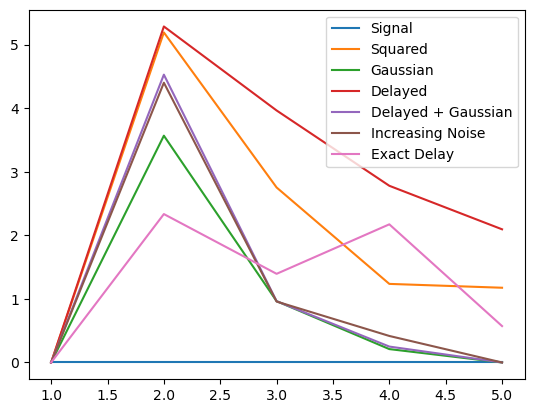

In [90]:
for sig, label in all_signals:
    plt.plot(range(1,6), sin_sig_te_by_w[label], label=label)
    
plt.legend()

## Binomial Tests

In [71]:
# random state--sum of binomial processes, each for one of 50 newspapers in the state
X = np.random.binomial(n=50, p=0.3, size=len(T))

In [76]:
# Now let's define a few alternatives 

X0 = np.array([i/2 for i in X]) # Half
X1 = np.array([np.random.binomial(n=50, p=0.5) if i > 12 else 0 for i in X ]) # Threshold
X2 = np.array([0] * d + [X[t-d] for t in range(len(X[:-d]))]) # Delayed
X3 = np.array([0] * d + 
              [np.random.binomial(n=50, p=0.5) if X[t-d] > 12 else 0 for t in range(len(X[:-d]))]) # Delayed Thresh
Y = np.random.binomial(n=50, p=0.3, size=len(T)) # Null

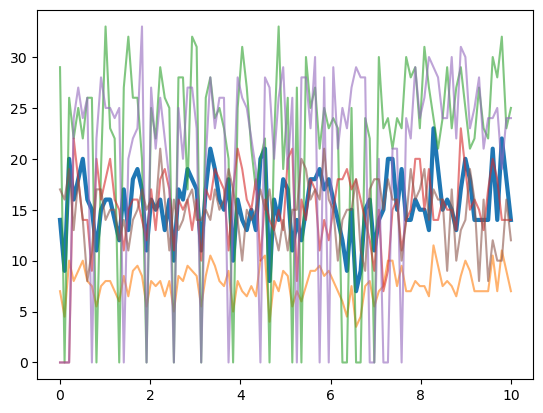

In [77]:
rand_ts = [(X, 'Signal'), (X0, 'Half'), (X1, 'Threshold'), (X2, 'Delayed'),
           (X3, 'Delayed Threshold'), (Y, 'Null')]

for sig, label in rand_ts:
    if label == 'Signal':
        a = 1
        t = 3
    else:
        a = 0.6
        t = 1.5
        
    plt.plot(T, sig, label=label, alpha=a, linewidth=t)


In [79]:
ste_41_bin = list()
for sig,label in rand_ts:
    TE = ste.symbolic_transfer_entropy(x=sig, y=X, w=4, s=1)
    ste_41_bin.append((TE, label))

In [80]:
ste_41_bin

[(0.0, 'Signal'),
 (0.0, 'Half'),
 (0.8163039475961544, 'Threshold'),
 (0.6713098685349193, 'Delayed'),
 (0.776573026429656, 'Delayed Threshold'),
 (0.9215671054908912, 'Null')]

In [81]:
ste_31_bin = list()
for sig,label in rand_ts:
    TE = ste.symbolic_transfer_entropy(x=sig, y=X, w=3, s=1)
    ste_31_bin.append((TE, label))

In [82]:
ste_31_bin

[(0.0, 'Signal'),
 (0.0, 'Half'),
 (1.3234696528557697, 'Threshold'),
 (1.762055853341919, 'Delayed'),
 (1.9382566321125803, 'Delayed Threshold'),
 (1.5119060127988462, 'Null')]

In [94]:
# Testing by window size

bin_sig_te_by_w = defaultdict(list)

for test_w in range(1, 6):
    for sig, label in rand_ts:
        te = ste.symbolic_transfer_entropy(x=sig, y=X, w=test_w, s=1)
        bin_sig_te_by_w[label].append(te)

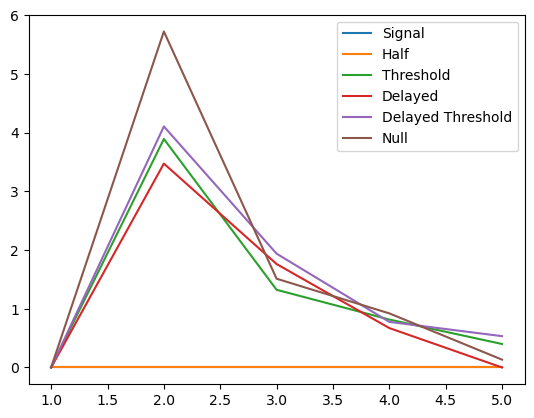

In [95]:
for sig, label in rand_ts:
    plt.plot(range(1,6), bin_sig_te_by_w[label], label=label)
    
plt.legend()